# 20기 Time Series 정규세션 과제

### Box - Jenkins 방법론
#### 식별
#### 추정
#### 진단
#### 예측

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
!pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMAResults
import warnings
warnings.filterwarnings("ignore")

     ---------------------------------------- 0.0/572.7 kB ? eta -:--:--
     ------- ------------------------------ 112.6/572.7 kB 2.2 MB/s eta 0:00:01
     -------------- ----------------------- 225.3/572.7 kB 2.8 MB/s eta 0:00:01
     ----------------------------- -------- 450.6/572.7 kB 3.1 MB/s eta 0:00:01
     -------------------------------------  563.2/572.7 kB 3.0 MB/s eta 0:00:01
     -------------------------------------- 572.7/572.7 kB 2.8 MB/s eta 0:00:00


In [4]:
samsung = yf.download('005930.KS', start='2020-01-01',end='2021-04-21',
                      progress=False)
samsung

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,50037.410156,12993228
2020-01-03,56000.0,56600.0,54900.0,55500.0,50309.355469,15422255
2020-01-06,54900.0,55600.0,54600.0,55500.0,50309.355469,10278951
2020-01-07,55700.0,56400.0,55600.0,55800.0,50581.296875,10009778
2020-01-08,56200.0,57400.0,55900.0,56800.0,51487.773438,23501171
...,...,...,...,...,...,...
2021-04-14,84000.0,84300.0,83400.0,84000.0,80003.203125,13794652
2021-04-15,83700.0,84500.0,83400.0,84100.0,80098.437500,16377412
2021-04-16,84700.0,84700.0,83600.0,83900.0,79907.960938,15429522


In [6]:
samsung = samsung[["Close"]]
samsung = samsung.reset_index()
samsung.columns = ['day', 'price']
samsung['day'] = pd.to_datetime(samsung['day'])
samsung.index = samsung['day']
samsung.set_index('day', inplace=True)

samsung

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0
...,...
2021-04-14,84000.0
2021-04-15,84100.0
2021-04-16,83900.0


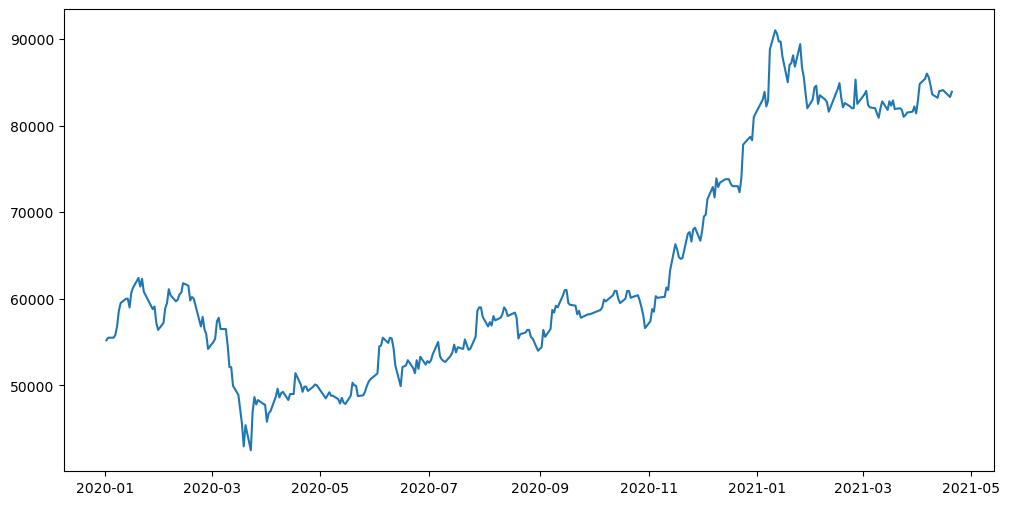

In [8]:
# price 시계열
plt.figure(figsize=(12,6))
plt.plot(samsung.index, samsung["price"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show()

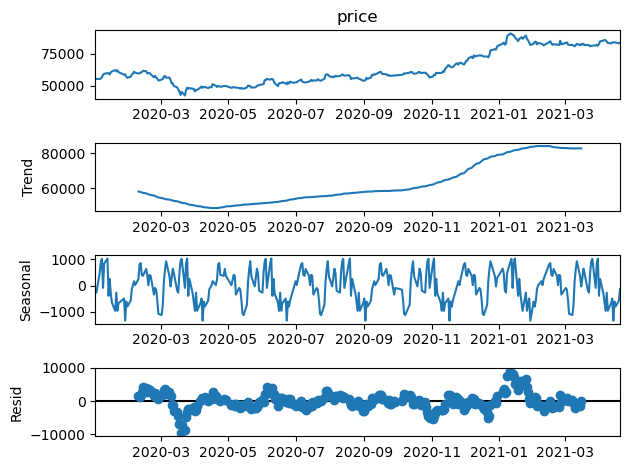

In [11]:
# trend, seasonal, resid 분해
s = seasonal_decompose(x = samsung["price"], model = "add", period=50)
s.plot();

# trend: 증가추세
# seasonal: 존재
# resid: 정상성 만족 여부 판단 필요

In [12]:
# 정상성 만족 여부 판단 _ ACF, PACF
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

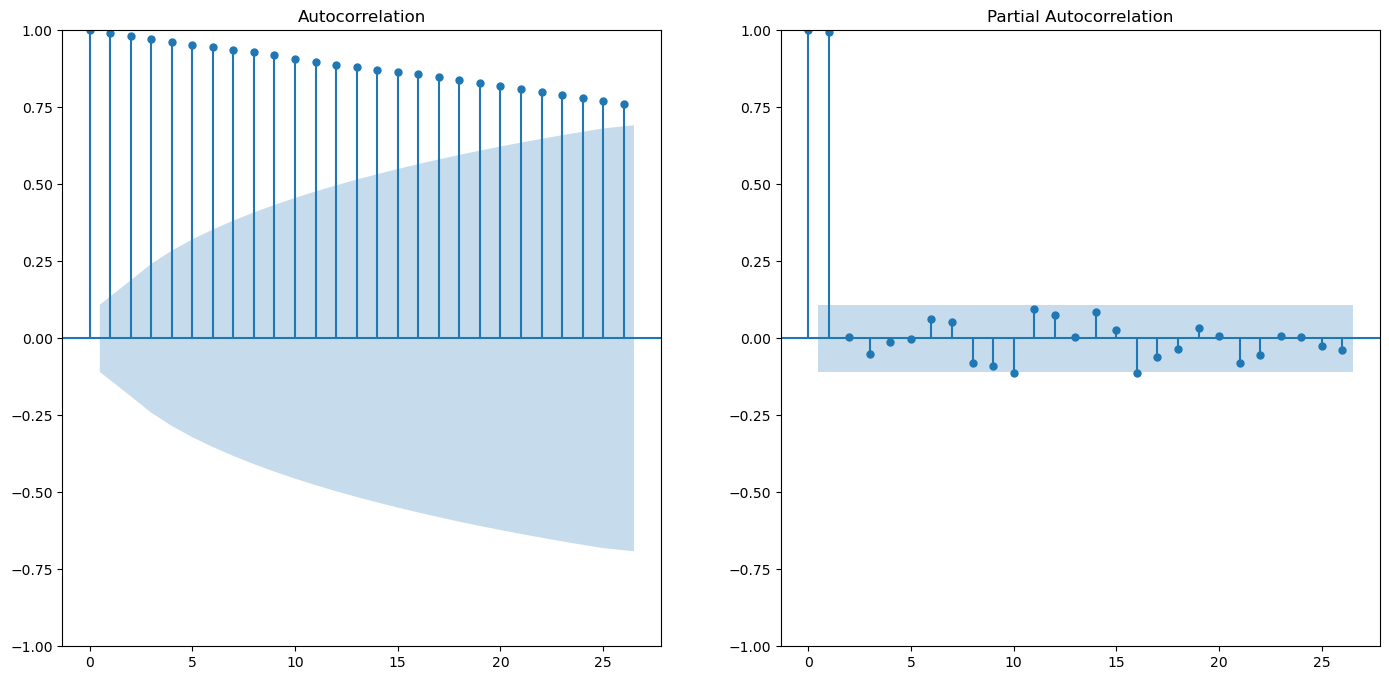

In [14]:
# 시각화 
# subplot
fig, ax = plt.subplots(1, 2, figsize = (17,8))
# acf plot
plot_acf(samsung['price'], ax = ax[0])
# pacf plot
plot_pacf(samsung['price'], ax= ax[1])
plt.show()

In [18]:
# 차분 
#차분을 위한 동일 열 생성
result = samsung['price'].to_frame(name="price")  
result = result.loc[::-1]                           
# 데이터의 행을 역순으로.
result["p_lag"] = result["price"].shift(periods=1)   
# t -> t-1 개로 밀어냄.

print(result)

              price    p_lag
day                         
2021-04-20  83900.0      NaN
2021-04-19  83300.0  83900.0
2021-04-16  83900.0  83300.0
2021-04-15  84100.0  83900.0
2021-04-14  84000.0  84100.0
...             ...      ...
2020-01-08  56800.0  58600.0
2020-01-07  55800.0  56800.0
2020-01-06  55500.0  55800.0
2020-01-03  55500.0  55500.0
2020-01-02  55200.0  55500.0

[322 rows x 2 columns]


In [19]:
# 차분 진행
result['diff_1'] = result['price'] - result['p_lag'] 
print(result)

              price    p_lag  diff_1
day                                 
2021-04-20  83900.0      NaN     NaN
2021-04-19  83300.0  83900.0  -600.0
2021-04-16  83900.0  83300.0   600.0
2021-04-15  84100.0  83900.0   200.0
2021-04-14  84000.0  84100.0  -100.0
...             ...      ...     ...
2020-01-08  56800.0  58600.0 -1800.0
2020-01-07  55800.0  56800.0 -1000.0
2020-01-06  55500.0  55800.0  -300.0
2020-01-03  55500.0  55500.0     0.0
2020-01-02  55200.0  55500.0  -300.0

[322 rows x 3 columns]


In [ ]:
result['']

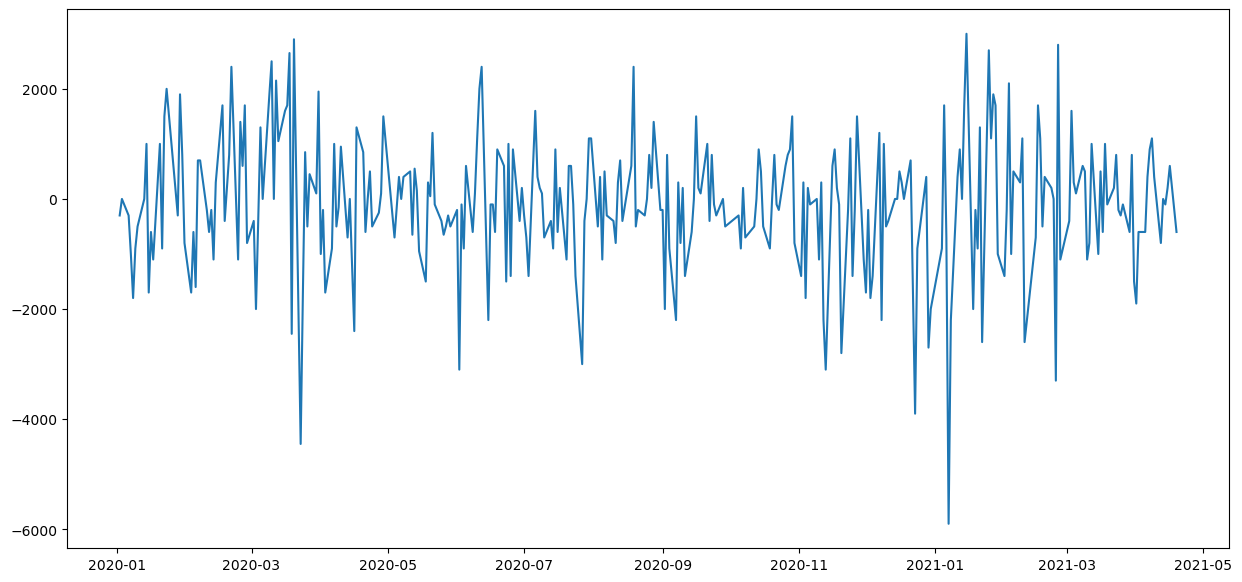

In [20]:
# 1차 차분 데이터 시계열 시각화
plt.figure(figsize=(15,7))
plt.plot(result.index, result["diff_1"], linestyle="-")
plt.show()

In [21]:
# adf test
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(result["diff_1"].dropna(), autolag='AIC')
pd.Series(dftest[0:4], index=['Test Statistic','p-value',
                              'Lags Used','Number of Observations Used'])

Test Statistic                -1.761089e+01
p-value                        3.880127e-30
Lags Used                      0.000000e+00
Number of Observations Used    3.200000e+02
dtype: float64

- 귀무가설: 정상시계열이 아니다. 
- 기각되었으므로 adf test에 의해 1차 차분 데이터는 정상성 충족 

In [22]:
# 최적 ARIMA 찾기
# 추세에 대한 ARIMA 진행 -> 계절성 ARIMA 진행

In [25]:
import itertools
p=q=range(0,3) # range(0,3) => p,q가 각각 0부터 2까지 

# trend 모수
trend_pdq = list(itertools.product(p,[1],q))

# seasonal 모수
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, [1], q))]


In [24]:
arima_model = sm.tsa.statespace.SARIMAX(samsung["price"], order=(0,1,1), 
                                        seasonal_order = (4,0,3,12))
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                      price   No. Observations:                  322
Model:             SARIMAX(0, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood               -2733.176
Date:                                    Wed, 30 Aug 2023   AIC                           5484.351
Time:                                            12:35:49   BIC                           5518.294
Sample:                                                 0   HQIC                          5497.904
                                                    - 322                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0120      0.048      0.252      0.801      -0.081       0.105
ar.S.L12      -0.1677      0.144     -1.168      0.243      -0.449       0.114
ar.S.L24       0.1628      0.190      0.858      0.391      -0.209       0.535
ar.S.L36       0.9764      0.067     14.546      0.000       0.845       1.108
ar.S.L48       0.0064      0.058      0.109      0.913      -0.108       0.121
ma.S.L12       0.1920      0.175      1.094      0.274      -0.152       0.536
ma.S.L24      -0.1588      0.225     -0.705      0.481      -0.600       0.283
ma.S.L36      -0.9781      0.122     -8.003      0.000      -1.218      -0.739
sigma2      1.513e+06   1.64e-07   9.23e+12      0.000    1.51e+06    1.51e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                33.43
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                             0.44
Prob(H) (two-sided):                  0.20   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.52e+28. Standard errors may be unstable.
"""

In [26]:
## SARIMAX
AIC = []
SARIMAX_order = []

for trend_param in trend_pdq:
    for seasonal_params in seasonal_pdq:
        try:
            arima_model = sm.tsa.statespace.SARIMAX(samsung["price"], 
                                                    order=trend_param, 
                                                    seasonal_order = seasonal_params)
            result = arima_model.fit()
            print('SARIMAX{}X{}, AIC={}, BIC={}'.format(trend_param, seasonal_params, result.aic, result.bic, end='\r'))
            AIC.append(result.aic)
            SARIMAX_order.append([trend_param, seasonal_params])
            
            
        except:
            continue

SARIMAX(0, 1, 0)X(0, 1, 0, 12), AIC=5488.114206056883, BIC=5491.84754733378
SARIMAX(0, 1, 0)X(0, 1, 1, 12), AIC=5442.4872310638, BIC=5449.953913617595
SARIMAX(0, 1, 0)X(0, 1, 2, 12), AIC=5425.161689933762, BIC=5436.361713764456
SARIMAX(0, 1, 0)X(1, 1, 0, 12), AIC=5457.438643236328, BIC=5464.905325790123
SARIMAX(0, 1, 0)X(1, 1, 1, 12), AIC=5420.344936169788, BIC=5431.544960000481
SARIMAX(0, 1, 0)X(1, 1, 2, 12), AIC=5422.198965775673, BIC=5437.132330883264
SARIMAX(0, 1, 0)X(2, 1, 0, 12), AIC=5447.895988278606, BIC=5459.096012109299
SARIMAX(0, 1, 0)X(2, 1, 1, 12), AIC=5422.207351407458, BIC=5437.1407165150495
SARIMAX(0, 1, 0)X(2, 1, 2, 12), AIC=5420.509621401654, BIC=5439.176327786143
SARIMAX(0, 1, 1)X(0, 1, 0, 12), AIC=5488.109165611833, BIC=5495.5758481656285
SARIMAX(0, 1, 1)X(0, 1, 1, 12), AIC=5443.234006271274, BIC=5454.434030101967
SARIMAX(0, 1, 1)X(0, 1, 2, 12), AIC=5425.4502653383515, BIC=5440.383630445943
SARIMAX(0, 1, 1)X(1, 1, 0, 12), AIC=5461.272108866625, BIC=5472.472132697319

In [27]:
##가장 작은 AIC 모수 출력
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_order[AIC.index(min(AIC))][0],
                                                             SARIMAX_order[AIC.index(min(AIC))][1]))


The smallest AIC is 5419.884787452263 for model SARIMAX(1, 1, 0)x(1, 1, 1, 12)


In [29]:
# 최적 모델 적용
arima_model = sm.tsa.statespace.SARIMAX(samsung["price"], order=(1, 1, 0), seasonal_order = (1, 1, 1, 12))
result = arima_model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                price   No. Observations:                  322
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -2705.942
Date:                              Wed, 30 Aug 2023   AIC                           5419.885
Time:                                      12:42:21   BIC                           5434.818
Sample:                                           0   HQIC                          5425.855
                                              - 322                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0481      0.050      0.965      0.335      -0.050       0.146
ar.S.L12       0.4804      0.021     22.509      0.000       0.439       0.522
ma.S.L12      -0.9161      0.032    -29.023      0.000      -0.978      -0.854
sigma2       2.22e+06   1.33e+05     16.703      0.000    1.96e+06    2.48e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                75.29
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.24
Prob(H) (two-sided):                  0.70   Kurtosis:                         5.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

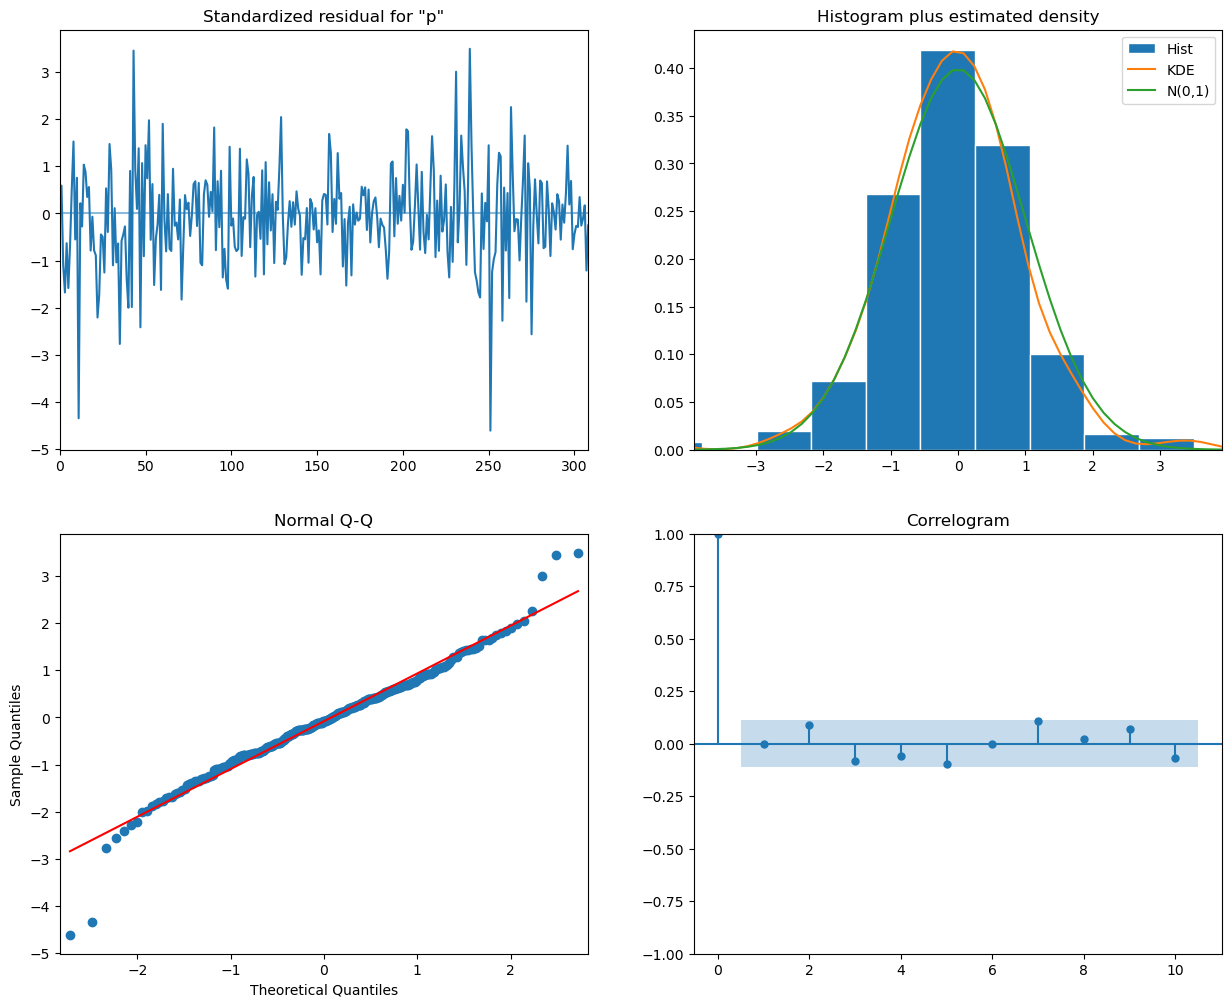

In [30]:
# 진단
result.plot_diagnostics(figsize=(15, 12))
plt.show()

In [31]:
# 예측 
pred = result.get_prediction(start=pd.to_datetime('2020-10-30'), dynamic=False)
pred_c= pred.conf_int()

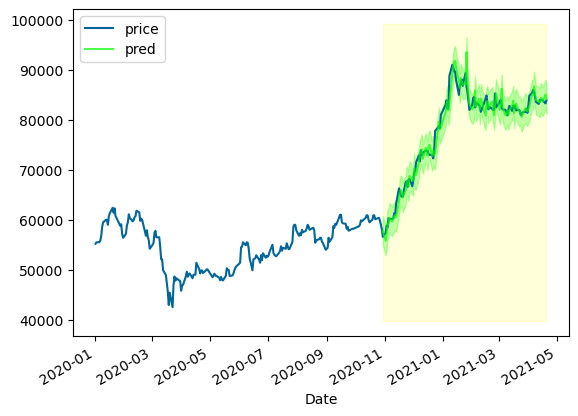

In [34]:
ax = samsung['2020-01-02':].plot(label='Observed',color='#006699');
pred.predicted_mean.plot(ax=ax, label='pred', alpha=.7, color='#00ff00');

ax.fill_between(pred_c.index, 
                pred_c.iloc[:, 0], 
                pred_c.iloc[:, 1], color='#00ff00', alpha=.25);

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2020-10-30'), samsung.index[-1], 
                 alpha=.15, zorder=-1, color='yellow');
ax.set_xlabel('Date');
plt.legend(loc='upper left');
plt.show()

In [36]:
# 향후 100일 예측
pred_100 = pd.DataFrame(result.forecast(steps = 100))

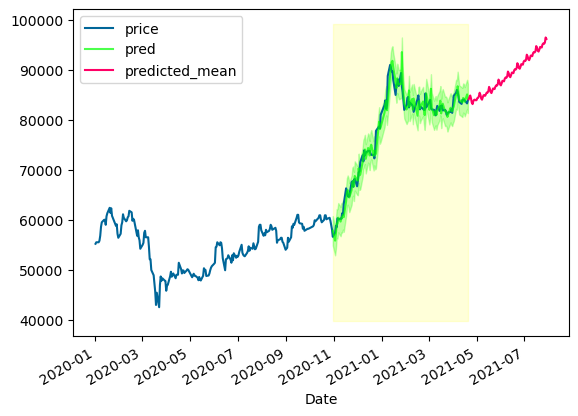

In [38]:
pred_100.set_index(pd.date_range(start=pd.to_datetime('2021-04-21'), end=pd.to_datetime('2021-07-29'), freq='D'), inplace=True)


ax = samsung['2020-01-02':].plot(label='Observed',color='#006699');
pred.predicted_mean.plot(ax=ax, label='pred', alpha=.7, color='#00ff00');
pred_100.plot(ax=ax, label='forecast', color='#ff0066')

ax.fill_between(pred_c.index, 
                pred_c.iloc[:, 0], 
                pred_c.iloc[:, 1], color='#00ff00', alpha=.25);

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2020-10-30'), samsung.index[-1], 
                 alpha=.15, zorder=-1, color='yellow');
ax.set_xlabel('Date');
plt.legend(loc='upper left');
plt.show()